In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import darts

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
import shap
import optuna
from sklearn.preprocessing import StandardScaler


operating_system ='mac'
if operating_system == 'win':
    path = f'C:/Users/fabau/OneDrive/Documents/GitHub/master-project/'
else:
    path = f'/Users/fabienaugsburger/Documents/GitHub/master-project/'

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

#import the X and y data in the format .npy
dataset = 'X_y_EU_1h'

dataset_type = '' #all_stat means the 4 stats, 2 means the storms one after another and nothing means only the mean stat

X_train = np.load(f'{path}DATASETS/{dataset}/X_train{dataset_type}.npy')
y_train = np.load(f'{path}DATASETS/{dataset}/y_train{dataset_type}.npy')
X_test = np.load(f'{path}DATASETS/{dataset}/X_test{dataset_type}.npy')
y_test = np.load(f'{path}DATASETS/{dataset}/y_test{dataset_type}.npy')
X_validation = np.load(f'{path}DATASETS/{dataset}/X_validation{dataset_type}.npy')
y_validation = np.load(f'{path}DATASETS/{dataset}/y_validation{dataset_type}.npy')

masking_value = 0#2**0.5

def preprocess_X_data(X):
    # Reshape the X array
    reshape = X.reshape(X.shape[0] * X.shape[1], X.shape[2])
    
    # Fit the StandardScaler to the reshaped X array
    reshape_std = StandardScaler().fit_transform(reshape)

    # Create the mask indicating where NaN values were originally located
    mask_X = np.isnan(X).reshape(X.shape[0], X.shape[1], X.shape[2])
    
    # Replace NaN values with -1e9 in X
    reshape_std[np.isnan(reshape_std)] = masking_value
    
    # Reshape the data back to the original shape for X
    X_processed = reshape_std.reshape(X.shape[0], X.shape[1], X.shape[2])

    return X_processed, mask_X

def preprocess_y_data(y):
    # Reshape the y array

    if dataset_type == '_all_stat':
        reshape = y.reshape(y.shape[0] * y.shape[1], y.shape[2])

        mask_y = np.isnan(y).reshape(y.shape[0], y.shape[1], y.shape[2])

        # Replace NaN values with -1e9 in X
        reshape[np.isnan(reshape)] = masking_value
        
        # Reshape the y array
        y_processed = reshape.reshape(y.shape[0], y.shape[1], y.shape[2])
    else:

    #reshape = y.reshape(y.shape[0] * y.shape[1], 1)

    # Fit the StandardScaler to the y array
    #reshape_std = StandardScaler().fit_transform(reshape)

    # Create the mask indicating where NaN values were originally located
        mask_y = np.isnan(y).reshape(y.shape[0], y.shape[1])

        # Replace NaN values with -1e9 in X
        y[np.isnan(y)] = masking_value
        
        # Reshape the y array
        y_processed = y.reshape(y.shape[0], y.shape[1], 1)
    
    return y_processed, mask_y

X_train, M_X_train = preprocess_X_data(X_train)
X_test, M_X_test = preprocess_X_data(X_test)
X_validation, M_X_validation = preprocess_X_data(X_validation)

'''if dataset_type == '0':
    y_train, M_y_train = preprocess_X_data(y_train)
    y_test, M_y_test = preprocess_X_data(y_test)
    y_validation, M_y_validation = preprocess_X_data(y_validation)'''

y_train, M_y_train = preprocess_y_data(y_train)
y_test, M_y_test = preprocess_y_data(y_test)
y_validation, M_y_validation = preprocess_y_data(y_validation)

Num GPUs Available:  1


In [4]:
X_serie = darts.TimeSeries.from_values(X_train)
y_serie = darts.TimeSeries.from_values(y_train)

Number of components is larger than 10 (185). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<Axes: xlabel='time'>

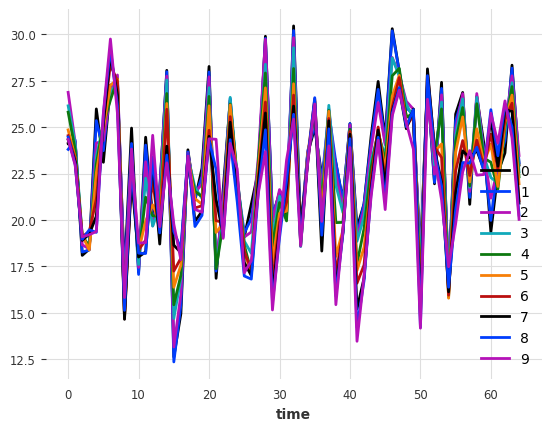

In [6]:
y_serie.plot()

In [7]:
import numpy as np
import pandas as pd
from darts import TimeSeries

# Sample data creation
# Assume wind_gusts is your target series with shape (65, 185, 1)
# and predictors is your multivariate covariates with shape (65, 185, 79)
# This is just random data for illustration
wind_gusts = np.random.rand(65, 185, 1)
predictors = np.random.rand(65, 185, 79)

# Convert to pandas DataFrames
wind_gusts_df = pd.DataFrame(wind_gusts.reshape(65 * 185, 1), columns=['wind_gust'])
predictors_df = pd.DataFrame(predictors.reshape(65 * 185, 79), columns=[f'var_{i}' for i in range(79)])

# Create TimeSeries objects
wind_gusts_series = TimeSeries.from_dataframe(wind_gusts_df, value_cols=['wind_gust'])
predictors_series = TimeSeries.from_dataframe(predictors_df, value_cols=[f'var_{i}' for i in range(79)])